In [138]:
import pandas as pd
Y_df = pd.read_csv('../notebook/datasets/combined.csv')
Y_df['ds'] = pd.to_datetime(Y_df['ds'])
Y_df = Y_df[Y_df['unique_id'] == 'H89']

In [139]:
# # uids = Y_df['unique_id'].unique()[:6] # Select 10 ids to make the example faster
# uids = ['H89']

# Y_df = Y_df.query('unique_id in @uids') 

# Y_df = Y_df.groupby('unique_id').tail(7 * 24) #Select last 7 days of data to make example faster
Y_df.fillna(0, inplace=True)
# Y_df.to_csv('combined_reduced.csv', index=False)
Y_df

,y,ds,unique_id
252,5.0,2019-01-01,H89
253,558.0,2019-01-02,H89
254,455.0,2019-01-03,H89
255,418.0,2019-01-04,H89
256,198.0,2019-01-05,H89
...,...,...,...
611,338.0,2019-12-27,H89
612,103.0,2019-12-28,H89
613,0.0,2019-12-29,H89
614,391.0,2019-12-30,H89


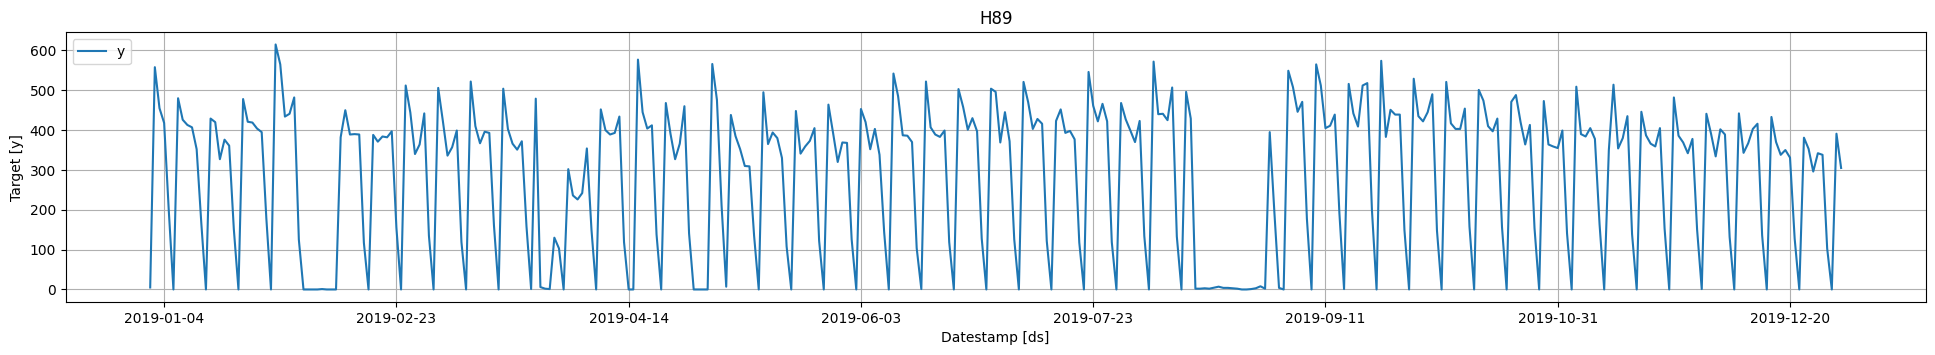

In [140]:
from statsforecast import StatsForecast

StatsForecast.plot(Y_df)

In [141]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

sf = StatsForecast(
    models = [AutoARIMA(season_length = 7)],
    freq = 'D'
)

sf.fit(Y_df)

StatsForecast(models=[AutoARIMA])

In [142]:
forecast_df = sf.predict(h=60, level=[90]) 

forecast_df

,ds,AutoARIMA,AutoARIMA-lo-90,AutoARIMA-hi-90
unique_id,,,,
H89,2020-01-01,300.713959,124.166611,477.261322
H89,2020-01-02,343.239563,149.377670,537.101501
H89,2020-01-03,351.394562,151.505035,551.284119
H89,2020-01-04,117.628609,-84.173721,319.430939
H89,2020-01-05,-3.384683,-205.819733,199.050369
H89,2020-01-06,406.601257,203.957275,609.245239
H89,2020-01-07,343.156433,140.443268,545.869629
H89,2020-01-08,319.117126,104.921310,533.312927
H89,2020-01-09,354.265350,137.728149,570.802551


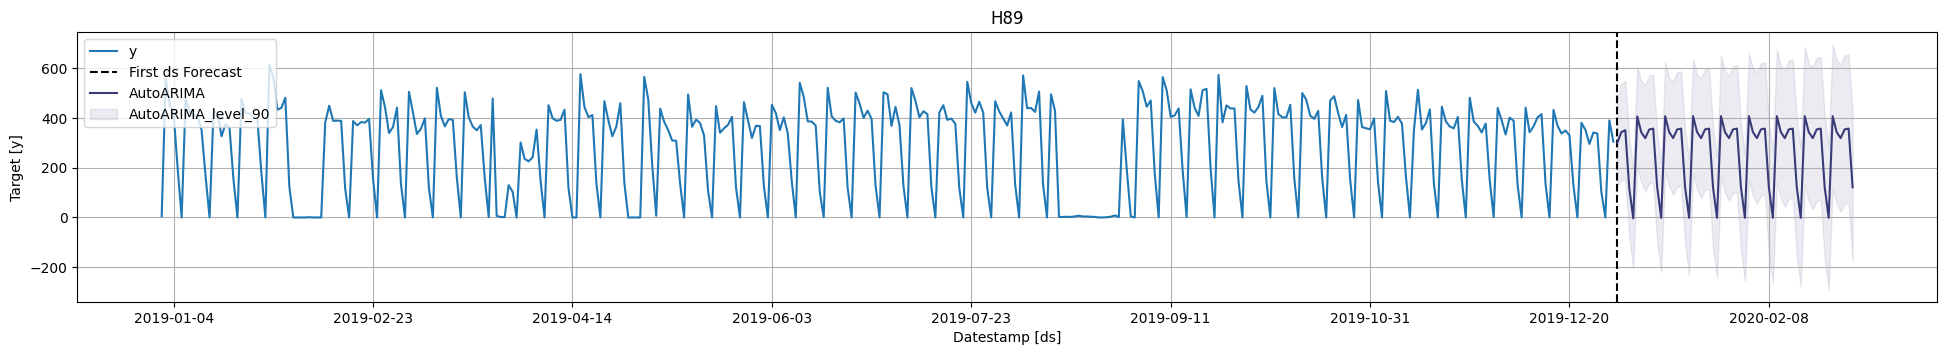

In [143]:
Y_df["ds"]=pd.to_datetime(Y_df["ds"])
sf.plot(Y_df, forecast_df, level=[90])

# Train/Test Split

In [144]:
y_train = Y_df[Y_df.ds <= '2019-11-01']
y_train.shape

(304, 3)

In [145]:
y_test = Y_df[Y_df.ds > '2019-11-01']
y_test.shape

(60, 3)

In [146]:
from IPython.display import display, Markdown

import matplotlib.pyplot as plt
from statsforecast import StatsForecast
from statsforecast.utils import AirPassengersDF
from statsforecast import StatsForecast
from statsforecast.models import (
    AutoARIMA,
    AutoETS,
    AutoCES,
    AutoTheta,
    AutoRegressive,    
    HoltWinters,
    CrostonClassic as Croston, 
    HistoricAverage,
    DynamicOptimizedTheta as DOT,
    SeasonalNaive
)


In [147]:
# Monthly data
season_length = 7

# Period we are predicting forward
horizon = len(y_test) # 12 
horizon

60

In [148]:
models = [
    AutoARIMA(season_length=season_length, ),
    # HoltWinters(),
    Croston(),
    SeasonalNaive(season_length=season_length),
    HistoricAverage(),
    DOT(season_length=season_length),
    AutoETS(season_length=season_length),
    AutoCES(season_length=season_length),
    AutoRegressive(lags=season_length),
    AutoTheta()
]

In [149]:
sf = StatsForecast(
    df=y_train,
    models=models,
    freq='D', 
    n_jobs=-1
    # fallback_model = SeasonalNaive(season_length=7)
)

In [150]:
# Forecast for the defined horizon
y_preds = sf.forecast(horizon)

In [151]:
y_preds = y_preds.merge(y_test, how='inner', on=['unique_id', 'ds'])
y_preds

,unique_id,ds,AutoARIMA,CrostonClassic,SeasonalNaive,HistoricAverage,DynamicOptimizedTheta,AutoETS,CES,AutoRegressive,AutoTheta,y
0,H89,2019-11-02,139.801468,333.019867,154.0,287.582245,344.714417,124.856750,128.639191,195.941971,338.208832,141.0
1,H89,2019-11-03,-9.717654,333.019867,0.0,287.582245,125.910416,-21.122425,-18.201414,102.281464,338.327789,0.0
2,H89,2019-11-04,473.692230,333.019867,473.0,287.582245,124.119720,457.803436,461.298798,352.508545,338.446747,509.0
3,H89,2019-11-05,418.192932,333.019867,364.0,287.582245,445.608093,396.845886,390.032684,362.892303,338.565735,390.0
4,H89,2019-11-06,389.924286,333.019867,359.0,287.582245,405.094482,367.439270,366.072266,321.690796,338.684723,384.0
5,H89,2019-11-07,375.805847,333.019867,355.0,287.582245,361.887024,353.166809,355.977844,344.545410,338.803680,405.0
6,H89,2019-11-08,419.105011,333.019867,399.0,287.582245,395.754364,396.402130,400.427246,381.177399,338.922668,378.0
7,H89,2019-11-09,150.483459,333.019867,154.0,287.582245,344.714417,124.856750,128.250748,236.831848,339.041656,164.0
8,H89,2019-11-10,-3.497045,333.019867,0.0,287.582245,125.910416,-21.122425,-17.742117,160.821228,339.160614,0.0
9,H89,2019-11-11,477.252960,333.019867,473.0,287.582245,124.119720,457.803436,461.547668,301.322510,339.279572,350.0


In [152]:
plot_df = pd.concat([y_train.tail(24), y_preds]).set_index('ds')

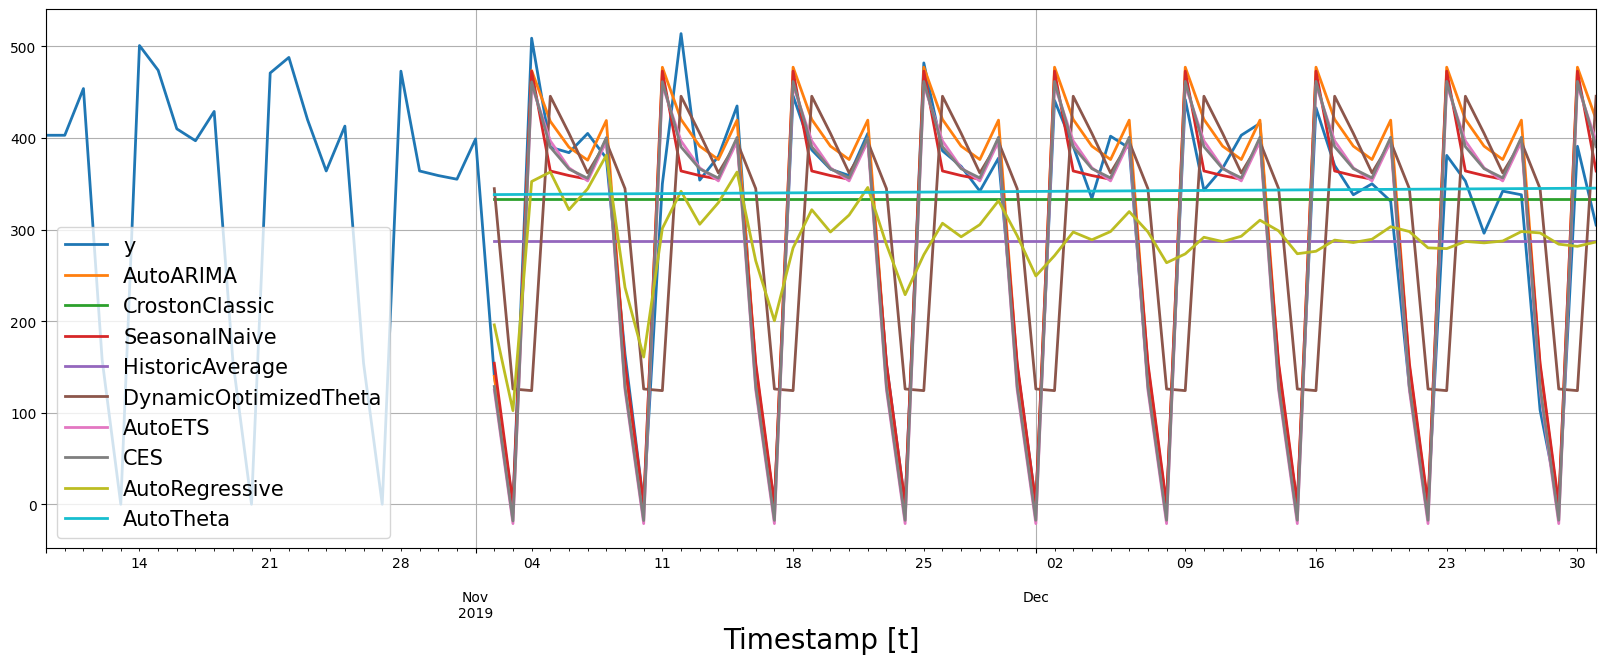

In [153]:
fig, ax = plt.subplots(1, 1, figsize = (20, 7))

plot_df[['y', "AutoARIMA",	"CrostonClassic"	,"SeasonalNaive"	,"HistoricAverage",	"DynamicOptimizedTheta"	,"AutoETS"	,"CES",	"AutoRegressive"	,"AutoTheta"]].plot(ax=ax, linewidth=2)

# ax.set_title('Air Passengers Forecast', fontsize=22)
# ax.set_ylabel('Monthly Passengers', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

# Model Evaluation

In [154]:
import numpy as np

In [155]:
from sklearn.metrics import r2_score

In [156]:
models = [ "AutoARIMA",		"CrostonClassic"	,"SeasonalNaive"	,"HistoricAverage",	"DynamicOptimizedTheta"	,"AutoETS"	,"CES",	"AutoRegressive"	,"AutoTheta"]
res = []
for model in models:
    res.append({
        "model": model,
        "r2_score": r2_score(y_preds['y'], y_preds[model])})
df = pd.DataFrame(res)
df.sort_values('r2_score', ascending=False)
    
    

,model,r2_score
6,CES,0.938967
5,AutoETS,0.938144
2,SeasonalNaive,0.934418
0,AutoARIMA,0.912691
7,AutoRegressive,0.279025
3,HistoricAverage,-0.000323
4,DynamicOptimizedTheta,-0.041705
1,CrostonClassic,-0.075782
8,AutoTheta,-0.112090


In [157]:
def MAE(true, preds):
    return np.mean( np.abs( true - preds ) )

In [158]:
MAE(y_preds['y'], y_preds['AutoARIMA'])

33.853794634342194

In [159]:
MAE(y_preds['y'], y_preds['AutoETS'])

28.854511324564616

In [160]:
MAE(y_preds['y'], y_preds['Naive'])

KeyError: 'Naive'

In [ ]:
y_preds['ensamble'] = (y_preds['AutoARIMA'] + y_preds['AutoETS']) / 2

In [ ]:
MAE(y_preds['y'], y_preds['ensamble'])

30.366474930445353

In [ ]:
r2_score(y_preds['y'], y_preds['AutoARIMA'])

0.9126913677560824

In [ ]:
y_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   unique_id  60 non-null     object        
 1   ds         60 non-null     datetime64[ns]
 2   AutoARIMA  60 non-null     float32       
 3   AutoETS    60 non-null     float32       
 4   Naive      60 non-null     float32       
 5   y          60 non-null     float64       
 6   ensamble   60 non-null     float32       
dtypes: datetime64[ns](1), float32(4), float64(1), object(1)
memory usage: 2.5+ KB
